In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras

In [63]:
learning_rate=0.001
train_size=0.8
seqlen=3
bs=32
epochs=150

In [64]:
scaler=pickle.load(P('问题2-MinMaxScaler-训练数据.csv').open('rb'))
df=pd.read_csv('问题2-训练数据-归一化.csv',index_col='time')

In [65]:
df_train, df_val = train_test_split(df, train_size=train_size, shuffle=True)

In [66]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    df_train.values, df_train.values, sequence_length=seqlen, batch_size=bs)

In [67]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    df_val.values, df_val.values, sequence_length=seqlen, batch_size=bs)

In [68]:
inputs = keras.layers.Input(shape=(SEQ, FEA))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(FEA)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3, 6)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                4992      
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 5,190
Trainable params: 5,190
Non-trainable params: 0
_________________________________________________________________


In [69]:
path_checkpoint = "problem2_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/150
1/3 [=========>....................] - ETA: 3s - loss: 0.1464
Epoch 1: val_loss improved from inf to 0.16773, saving model to problem2_checkpoint.h5
3/3 [==============================] - 2s 253ms/step - loss: 0.1632 - val_loss: 0.1677
Epoch 2/150
1/3 [=========>....................] - ETA: 0s - loss: 0.1350
Epoch 2: val_loss improved from 0.16773 to 0.15601, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 73ms/step - loss: 0.1511 - val_loss: 0.1560
Epoch 3/150
1/3 [=========>....................] - ETA: 0s - loss: 0.1241
Epoch 3: val_loss improved from 0.15601 to 0.14475, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 52ms/step - loss: 0.1396 - val_loss: 0.1448
Epoch 4/150
1/3 [=========>....................] - ETA: 0s - loss: 0.1137
Epoch 4: val_loss improved from 0.14475 to 0.13388, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 49ms/step - loss: 0.1286 - val_loss: 0.1339

3/3 [==============================] - 0s 53ms/step - loss: 0.0380 - val_loss: 0.0430
Epoch 34/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0279
Epoch 34: val_loss improved from 0.04303 to 0.04223, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 52ms/step - loss: 0.0374 - val_loss: 0.0422
Epoch 35/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0274
Epoch 35: val_loss improved from 0.04223 to 0.04142, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 50ms/step - loss: 0.0367 - val_loss: 0.0414
Epoch 36/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0269
Epoch 36: val_loss improved from 0.04142 to 0.04063, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 50ms/step - loss: 0.0360 - val_loss: 0.0406
Epoch 37/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0264
Epoch 37: val_loss improved from 0.04063 to 0.03984, saving model to problem2_ch

1/3 [=========>....................] - ETA: 0s - loss: 0.0147
Epoch 66: val_loss improved from 0.02398 to 0.02360, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 53ms/step - loss: 0.0185 - val_loss: 0.0236
Epoch 67/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0144
Epoch 67: val_loss improved from 0.02360 to 0.02323, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 54ms/step - loss: 0.0181 - val_loss: 0.0232
Epoch 68/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0142
Epoch 68: val_loss improved from 0.02323 to 0.02287, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 50ms/step - loss: 0.0177 - val_loss: 0.0229
Epoch 69/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0140
Epoch 69: val_loss improved from 0.02287 to 0.02250, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 54ms/step - loss: 0.0173 - val_loss: 0.0225
E

3/3 [==============================] - 0s 50ms/step - loss: 0.0104 - val_loss: 0.0141
Epoch 99/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0093
Epoch 99: val_loss improved from 0.01413 to 0.01393, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 51ms/step - loss: 0.0103 - val_loss: 0.0139
Epoch 100/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0092
Epoch 100: val_loss improved from 0.01393 to 0.01372, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 50ms/step - loss: 0.0102 - val_loss: 0.0137
Epoch 101/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0091
Epoch 101: val_loss improved from 0.01372 to 0.01353, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 59ms/step - loss: 0.0100 - val_loss: 0.0135
Epoch 102/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0090
Epoch 102: val_loss improved from 0.01353 to 0.01334, saving model to probl

Epoch 131/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0068
Epoch 131: val_loss improved from 0.00942 to 0.00932, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 50ms/step - loss: 0.0070 - val_loss: 0.0093
Epoch 132/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0067
Epoch 132: val_loss improved from 0.00932 to 0.00922, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 61ms/step - loss: 0.0070 - val_loss: 0.0092
Epoch 133/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0066
Epoch 133: val_loss improved from 0.00922 to 0.00912, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 55ms/step - loss: 0.0069 - val_loss: 0.0091
Epoch 134/150
1/3 [=========>....................] - ETA: 0s - loss: 0.0066
Epoch 134: val_loss improved from 0.00912 to 0.00902, saving model to problem2_checkpoint.h5
3/3 [==============================] - 0s 55ms/step - loss: 0.0068

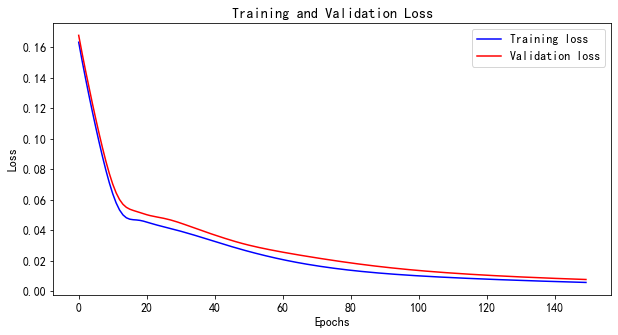

In [70]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")